In [ ]:
cd /content/drive/My Drive

In [2]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pylab as plt

In [3]:
data = pd.read_csv( 'CRM-Project-Noorbehbahani-Dataset.csv' )

In [4]:
data.head(10)

,id,Toole_Ketab,Miangin_Ketab,Majmoo_Gheimat,Miangin_Gheimat,Review,Emtiaze_review,Completion,Daghayeghe-Shenide shode,Darkhaste-Poshtibani,Zamane_akharin_bazdid -Zamane_kharid,Target
0,994,1620.0,1620,19.73,19.73,1,10.0,0.99,1603.8,5,92,0
1,1143,2160.0,2160,5.33,5.33,0,NaN,0.00,0.0,0,0,0
2,2059,2160.0,2160,5.33,5.33,0,NaN,0.00,0.0,0,388,0
3,2882,1620.0,1620,5.96,5.96,0,NaN,0.42,680.4,1,129,0
4,3342,2160.0,2160,5.33,5.33,0,NaN,0.22,475.2,0,361,0
5,3416,2160.0,2160,4.61,4.61,0,NaN,0.00,0.0,0,0,0
6,4949,2160.0,2160,5.33,5.33,0,NaN,0.04,86.4,0,366,0
7,9011,648.0,648,5.33,5.33,0,NaN,0.00,0.0,0,0,1
8,9282,2160.0,2160,5.33,5.33,0,NaN,0.26,561.6,0,33,0
9,10500,2160.0,2160,5.33,5.33,1,10.0,0.27,583.2,0,366,0


In [5]:
# searching for missing values
print("missing value")
print(data.isna().sum())

missing value
id                                          0
Toole_Ketab                                 0
Miangin_Ketab                               0
Majmoo_Gheimat                              0
Miangin_Gheimat                             0
Review                                      0
Emtiaze_review                          11616
Completion                                  0
Daghayeghe-Shenide shode                    0
Darkhaste-Poshtibani                        0
Zamane_akharin_bazdid -Zamane_kharid        0
Target                                      0
dtype: int64


**Customer segmentation using RFM 



In [6]:
# sort data recency
data_recency = data.groupby(by='id',as_index=False)['Zamane_akharin_bazdid -Zamane_kharid'].max()

In [7]:
data_recency.columns = ['CustomerID', 'R']

In [8]:
data_recency.head(10)

,CustomerID,R
0,2,0
1,3,0
2,6,0
3,10,0
4,11,0
5,12,12
6,17,0
7,18,61
8,21,8
9,23,38


In [9]:
def buying_freq(x):
  return x['Majmoo_Gheimat']/x['Miangin_Gheimat']

In [10]:
data['Quantity'] = data.apply(buying_freq, axis=1)

In [11]:
for i in range(len(data)):
  data['Quantity'][i] = int(data['Quantity'][i])

<ipython-input-11-a6eb75a55a46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quantity'][i] = int(data['Quantity'][i])


In [12]:
data_frequency = data.groupby(by='id',as_index=False)['Quantity'].max()

In [13]:
data_frequency.columns = ['CustomerID', 'F']

In [14]:
data_frequency.head(10)

,CustomerID,F
0,2,1.0
1,3,1.0
2,6,1.0
3,10,1.0
4,11,1.0
5,12,1.0
6,17,1.0
7,18,1.0
8,21,1.0
9,23,1.0


In [15]:
data_monetary = data.groupby(by='id',as_index=False)['Majmoo_Gheimat'].max()

In [16]:
data_monetary.columns = ['CustomerID', 'M']

In [17]:
data_monetary.head(10)

,CustomerID,M
0,2,7.68
1,3,5.33
2,6,8.61
3,10,5.87
4,11,5.95
5,12,5.33
6,17,8.00
7,18,5.33
8,21,5.33
9,23,8.00


In [19]:
rf_data = data_recency.merge(data_frequency, on='CustomerID')

In [20]:
rfm_data = rf_data.merge(data_monetary, on='CustomerID')

In [21]:
rfm_data.head(5)

,CustomerID,R,F,M
0,2,0,1.0,7.68
1,3,0,1.0,5.33
2,6,0,1.0,8.61
3,10,0,1.0,5.87
4,11,0,1.0,5.95


In [22]:
# sorting R and F and M
R=rfm_data[["CustomerID","R"]].sort_values(by="R",ignore_index=True,ascending=False)
F=rfm_data[["CustomerID","F"]].sort_values(by="F",ignore_index=True,ascending=False)
M=rfm_data[["CustomerID","M"]].sort_values(by="M",ignore_index=True,ascending=False)

In [23]:
# Divide R into three segments
R1=R.iloc[0:4965,:]
R2=R.iloc[4965:9390,:]
R3=R.iloc[9390:14084,:]

In [24]:
# Divide F into three segments
F1=F.iloc[0:4965,:]
F2=F.iloc[4965:9390,:]
F3=F.iloc[9390:14084,:]

In [25]:
# Divide M into three segments
M1=M.iloc[0:4965,:]
M2=M.iloc[4965:9390,:]
M3=M.iloc[9390:14084,:]

In [26]:
# Merge R and F
s_11=pd.merge(R1,F1,on='CustomerID')
s_12=pd.merge(R1,F2,on='CustomerID')
s_13=pd.merge(R1,F3,on='CustomerID')

# Segment-R2 and F
s_21=pd.merge(R2,F1,on='CustomerID')
s_22=pd.merge(R2,F2,on='CustomerID')
s_23=pd.merge(R2,F3,on='CustomerID')

#9 Segment-R3 and F
s_31=pd.merge(R3,F1,on='CustomerID')
s_32=pd.merge(R3,F2,on='CustomerID')
s_33=pd.merge(R3,F3,on='CustomerID')

In [27]:
# Merge R and F scores with M to create 27 segments
s_111=pd.merge(s_11,M1,on='CustomerID')
s_112=pd.merge(s_11,M2,on='CustomerID')
s_113=pd.merge(s_11,M3,on='CustomerID')
s_121=pd.merge(s_12,M1,on='CustomerID')
s_122=pd.merge(s_12,M2,on='CustomerID')
s_123=pd.merge(s_12,M3,on='CustomerID')
s_131=pd.merge(s_13,M1,on='CustomerID')
s_132=pd.merge(s_13,M2,on='CustomerID')
s_133=pd.merge(s_13,M3,on='CustomerID')
s_211=pd.merge(s_21,M1,on='CustomerID')
s_212=pd.merge(s_21,M2,on='CustomerID')
s_213=pd.merge(s_21,M3,on='CustomerID')
s_221=pd.merge(s_22,M1,on='CustomerID')
s_222=pd.merge(s_22,M2,on='CustomerID')
s_223=pd.merge(s_22,M3,on='CustomerID')
s_231=pd.merge(s_23,M1,on='CustomerID')
s_232=pd.merge(s_23,M2,on='CustomerID')
s_233=pd.merge(s_23,M3,on='CustomerID')
s_311=pd.merge(s_31,M1,on='CustomerID')
s_312=pd.merge(s_31,M2,on='CustomerID')
s_313=pd.merge(s_31,M3,on='CustomerID')
s_321=pd.merge(s_32,M1,on='CustomerID')
s_322=pd.merge(s_32,M2,on='CustomerID')
s_323=pd.merge(s_32,M3,on='CustomerID')
s_331=pd.merge(s_33,M1,on='CustomerID')
s_332=pd.merge(s_33,M2,on='CustomerID')
s_333=pd.merge(s_33,M3,on='CustomerID')

In [28]:
x = np.array(["s_111","s_112","s_113","s_121","s_122","s_123","s_131","s_132","s_133","s_211","s_212","s_213", "s_221", "s_222", "s_223", 
"s_231","s_232","s_233", "s_311","s_312","s_313", "s_321","s_322","s_323", "s_331","s_332","s_333"])

y = np.array([s_111['CustomerID'].count(),s_112['CustomerID'].count(), s_113['CustomerID'].count(), s_121['CustomerID'].count(),
s_122['CustomerID'].count(), s_123['CustomerID'].count(), s_131['CustomerID'].count(), s_132['CustomerID'].count(),
s_133['CustomerID'].count(), s_211['CustomerID'].count(),  s_212['CustomerID'].count(), s_213['CustomerID'].count(),
s_221['CustomerID'].count(),  s_222['CustomerID'].count(), s_223['CustomerID'].count(), s_231['CustomerID'].count(),
s_232['CustomerID'].count(), s_233['CustomerID'].count(), s_311['CustomerID'].count(), s_312['CustomerID'].count(),
s_313['CustomerID'].count(), s_321['CustomerID'].count(), s_322['CustomerID'].count(), s_323['CustomerID'].count(),
s_331['CustomerID'].count(), s_332['CustomerID'].count(), s_333['CustomerID'].count()])

In [29]:
#Pritnting number of customers in each segments
print("number of customers in segment 111 is: ",s_111['CustomerID'].count())
print("number of customers in segment 112 is: ",s_112['CustomerID'].count())
print("number of customers in segment 113 is: ",s_113['CustomerID'].count())
print("number of customers in segment 121 is: ",s_121['CustomerID'].count())
print("number of customers in segment 122 is: ",s_122['CustomerID'].count())
print("number of customers in segment 123 is: ",s_123['CustomerID'].count())
print("number of customers in segment 131 is: ",s_131['CustomerID'].count())
print("number of customers in segment 132 is: ",s_132['CustomerID'].count())
print("number of customers in segment 133 is: ",s_133['CustomerID'].count())
print("number of customers in segment 211 is: ",s_211['CustomerID'].count())
print("number of customers in segment 212 is: ",s_212['CustomerID'].count())
print("number of customers in segment 213 is: ",s_213['CustomerID'].count())
print("number of customers in segment 221 is: ",s_221['CustomerID'].count())
print("number of customers in segment 222 is: ",s_222['CustomerID'].count())
print("number of customers in segment 223 is: ",s_223['CustomerID'].count())
print("number of customers in segment 231 is: ",s_231['CustomerID'].count())
print("number of customers in segment 232 is: ",s_232['CustomerID'].count())
print("number of customers in segment 233 is: ",s_233['CustomerID'].count())
print("number of customers in segment 311 is: ",s_311['CustomerID'].count())
print("number of customers in segment 312 is: ",s_312['CustomerID'].count())
print("number of customers in segment 313 is: ",s_313['CustomerID'].count())
print("number of customers in segment 321 is: ",s_321['CustomerID'].count())
print("number of customers in segment 322 is: ",s_322['CustomerID'].count())
print("number of customers in segment 323 is: ",s_323['CustomerID'].count())
print("number of customers in segment 331 is: ",s_331['CustomerID'].count())
print("number of customers in segment 332 is: ",s_332['CustomerID'].count())
print("number of customers in segment 121 is: ",s_333['CustomerID'].count())

number of customers in segment 111 is:  671
number of customers in segment 112 is:  385
number of customers in segment 113 is:  653
number of customers in segment 121 is:  587
number of customers in segment 122 is:  624
number of customers in segment 123 is:  314
number of customers in segment 131 is:  628
number of customers in segment 132 is:  514
number of customers in segment 133 is:  589
number of customers in segment 211 is:  621
number of customers in segment 212 is:  406
number of customers in segment 213 is:  654
number of customers in segment 221 is:  634
number of customers in segment 222 is:  645
number of customers in segment 223 is:  284
number of customers in segment 231 is:  453
number of customers in segment 232 is:  307
number of customers in segment 233 is:  421
number of customers in segment 311 is:  449
number of customers in segment 312 is:  401
number of customers in segment 313 is:  725
number of customers in segment 321 is:  390
number of customers in segment 3

<BarContainer object of 27 artists>

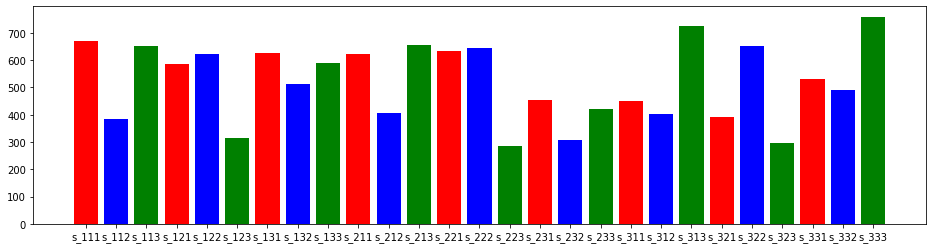

In [68]:
c = ['red', 'blue' , 'green' ]
plt.figure(figsize=(16,4))
plt.bar(x,y , color = c)

**RFM part two cell sort**

In [31]:
data1 = pd.read_csv( 'CRM-Project-Noorbehbahani-Dataset.csv' )

In [32]:
data_recency1 = data1.groupby(by='id',as_index=False)['Zamane_akharin_bazdid -Zamane_kharid'].max()
data_recency1.columns = ['CustomerID', 'Recency']

In [33]:
def buying_freq(x):
  return x['Majmoo_Gheimat']/x['Miangin_Gheimat']

In [34]:
data1['Quantity'] = data1.apply(buying_freq, axis=1)

In [35]:

for i in range(len(data1)):
  data1['Quantity'][i] = int(data1['Quantity'][i])

<ipython-input-35-d397810bec93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Quantity'][i] = int(data1['Quantity'][i])


In [36]:

data_frequency1 = data1.groupby(by='id',as_index=False)['Quantity'].max()
data_frequency1.columns = ['CustomerID', 'Frequency']

In [37]:

data_monetary1 = data1.groupby(by='id',as_index=False)['Majmoo_Gheimat'].max()
data_monetary1.columns = ['CustomerID', 'Monetary']

In [38]:

rf_data1 = data_recency1.merge(data_frequency1, on='CustomerID')
rfm_data1 = rf_data1.merge(data_monetary1, on='CustomerID')

In [39]:
rfm_data1.head(50)

,CustomerID,Recency,Frequency,Monetary
0,2,0,1.0,7.68
1,3,0,1.0,5.33
2,6,0,1.0,8.61
3,10,0,1.0,5.87
4,11,0,1.0,5.95
5,12,12,1.0,5.33
6,17,0,1.0,8.00
7,18,61,1.0,5.33
8,21,8,1.0,5.33
9,23,38,1.0,8.00


In [40]:
rfm_data1 = rfm_data1.sort_values(by=['Recency'],ascending=False, ignore_index = True)

In [41]:
rfm_data1.head(50)

,CustomerID,Recency,Frequency,Monetary
0,12089,464,1.0,8.62
1,2059,388,1.0,5.33
2,25991,387,1.0,5.33
3,15384,383,1.0,9.77
4,23676,379,1.0,5.33
5,33391,375,1.0,9.77
6,17585,374,0.0,9.84
7,13440,371,1.0,5.33
8,32101,371,1.0,4.10
9,33341,369,1.0,10.13


In [42]:
seg1=rfm_data1.iloc[0:4695,:]
seg2=rfm_data1.iloc[4695:9390,:]
seg3=rfm_data1.iloc[9390:14084,:]

In [43]:
data1.head(4000)

,id,Toole_Ketab,Miangin_Ketab,Majmoo_Gheimat,Miangin_Gheimat,Review,Emtiaze_review,Completion,Daghayeghe-Shenide shode,Darkhaste-Poshtibani,Zamane_akharin_bazdid -Zamane_kharid,Target,Quantity
0,994,1620.0,1620,19.73,19.73,1,10.0,0.99,1603.8,5,92,0,1.0
1,1143,2160.0,2160,5.33,5.33,0,NaN,0.00,0.0,0,0,0,1.0
2,2059,2160.0,2160,5.33,5.33,0,NaN,0.00,0.0,0,388,0,1.0
3,2882,1620.0,1620,5.96,5.96,0,NaN,0.42,680.4,1,129,0,1.0
4,3342,2160.0,2160,5.33,5.33,0,NaN,0.22,475.2,0,361,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,5292,1620.0,1620,7.08,7.08,0,NaN,0.52,842.4,0,105,0,1.0
3996,5318,1620.0,1620,6.40,6.40,0,NaN,0.00,0.0,0,0,0,1.0
3997,5329,2160.0,2160,6.39,6.39,0,NaN,0.00,0.0,0,0,0,1.0
3998,5459,1188.0,1188,6.39,6.39,0,NaN,0.00,0.0,0,7,0,1.0


In [44]:
seg1=seg1.sort_values(by="Frequency",ignore_index=True,ascending=False)
seg2=seg2.sort_values(by="Frequency",ignore_index=True,ascending=False)
seg3=seg3.sort_values(by="Frequency",ignore_index=True,ascending=False)

In [45]:
seg11=seg1.iloc[0:1565,:]
seg12=seg1.iloc[1565:3130,:]
seg13=seg1.iloc[3130:4695,:]

In [46]:
seg21=seg2.iloc[0:1565,:]
seg22=seg2.iloc[1565:3130,:]
seg23=seg2.iloc[3130:4695,:]

In [47]:
seg31=seg3.iloc[0:1565,:]
seg32=seg3.iloc[1565:3130,:]
seg33=seg3.iloc[3130:4694,:]

In [48]:
seg11 = seg11.sort_values(by="Monetary",ignore_index=True,ascending=False)
seg12 = seg12.sort_values(by="Monetary",ignore_index=True,ascending=False)
seg13 = seg13.sort_values(by="Monetary",ignore_index=True,ascending=False)
seg21 = seg21.sort_values(by="Monetary",ignore_index=True,ascending=False)
seg22 = seg22.sort_values(by="Monetary",ignore_index=True,ascending=False)
seg23 = seg23.sort_values(by="Monetary",ignore_index=True,ascending=False)
seg31 = seg31.sort_values(by="Monetary",ignore_index=True,ascending=False)
seg32 = seg32.sort_values(by="Monetary",ignore_index=True,ascending=False)
seg33 = seg33.sort_values(by="Monetary",ignore_index=True,ascending=False)

In [49]:
seg111 = seg11.iloc[0:522,:]
seg112 = seg11.iloc[522:1044,:]
seg113 = seg11.iloc[1044:1565,:]

In [50]:
seg121 = seg12.iloc[0:522,:]
seg122 = seg12.iloc[522:1044,:]
seg123 = seg12.iloc[1044:1565,:]

In [51]:
seg131 = seg13.iloc[0:522,:]
seg132 = seg13.iloc[522:1044,:]
seg133 = seg13.iloc[1044:1565,:]

In [52]:
seg211 = seg21.iloc[0:522,:]
seg212 = seg21.iloc[522:1044,:]
seg213 = seg21.iloc[1044:1565,:]

In [53]:
seg221 = seg22.iloc[0:522,:]
seg222 = seg22.iloc[522:1044,:]
seg223 = seg22.iloc[1044:1565,:]

In [54]:
seg231 = seg23.iloc[0:522,:]
seg232 = seg23.iloc[522:1044,:]
seg233 = seg23.iloc[1044:1565,:]

In [55]:
seg311 = seg31.iloc[0:522,:]
seg312 = seg31.iloc[522:1044,:]
seg313 = seg31.iloc[1044:1565,:]

In [56]:
seg321 = seg32.iloc[0:522,:]
seg322 = seg32.iloc[522:1044,:]
seg323 = seg32.iloc[1044:1565,:]

In [57]:
seg331 = seg33.iloc[0:522,:]
seg332 = seg33.iloc[522:1044,:]
seg333 = seg33.iloc[1044:1564,:]

In [58]:
x1 = np.array(["s_111","s_112","s_113","s_121","s_122","s_123", "s_131","s_132","s_133", "s_211","s_212","s_213", "s_221","s_222",
"s_223","s_231","s_232", "s_233", "s_311","s_312","s_313", "s_321","s_322","s_323","s_331","s_332","s_333"])

In [59]:
y1 = np.array([seg111['Monetary'].mean(),seg112['Monetary'].mean(),seg113['Monetary'].mean(),seg121['Monetary'].mean(),
seg122['Monetary'].mean(),seg123['Monetary'].mean(), seg131['Monetary'].mean(),seg132['Monetary'].mean(),seg133['Monetary'].mean(),
seg211['Monetary'].mean(), seg212['Monetary'].mean(),seg213['Monetary'].mean(), seg221['Monetary'].mean(),seg222['Monetary'].mean(),
seg223['Monetary'].mean(), seg231['Monetary'].mean(), seg232['Monetary'].mean(), seg233['Monetary'].mean(), seg311['Monetary'].mean(),
seg312['Monetary'].mean(), seg313['Monetary'].mean(), seg321['Monetary'].mean(), seg322['Monetary'].mean(),seg323['Monetary'].mean(),
seg331['Monetary'].mean(), seg332['Monetary'].mean(), seg333['Monetary'].mean()])

In [60]:
y2 = np.array([seg111['Frequency'].mean(),seg112['Frequency'].mean(),seg113['Frequency'].mean(),seg121['Frequency'].mean(),
seg122['Frequency'].mean(),seg123['Frequency'].mean(), seg131['Frequency'].mean(), seg132['Frequency'].mean(),
seg133['Frequency'].mean(),seg211['Frequency'].mean(), seg212['Frequency'].mean(), seg213['Frequency'].mean(),
seg221['Frequency'].mean(), seg222['Frequency'].mean(), seg223['Frequency'].mean(), seg231['Frequency'].mean(),
seg232['Frequency'].mean(), seg233['Frequency'].mean(), seg311['Frequency'].mean(), seg312['Frequency'].mean(),
seg313['Frequency'].mean(), seg321['Frequency'].mean(), seg322['Frequency'].mean(), seg323['Frequency'].mean(),
seg331['Frequency'].mean(), seg332['Frequency'].mean(), seg333['Frequency'].mean()])

Text(0.5, 1.0, 'Monetary Average')

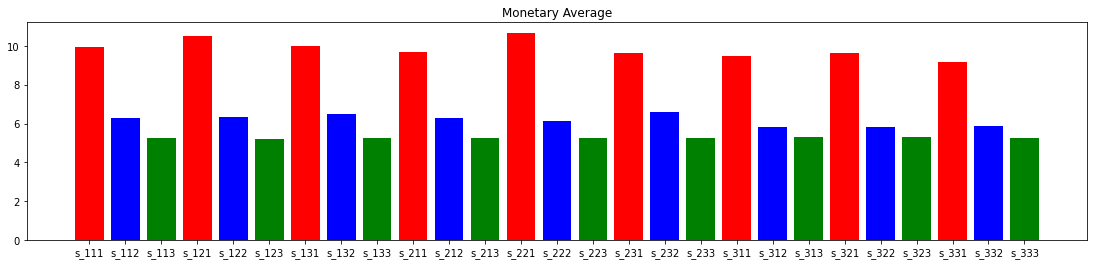

In [66]:
c = ['red', 'blue' , 'green' ]
plt.figure(figsize=(19,4))
plt.bar(x1,y1 , color = c)
plt.title("Monetary Average")

Text(0.5, 1.0, 'Frequency Average')

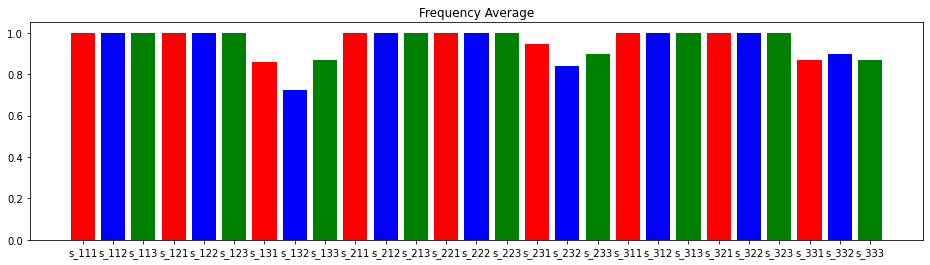

In [67]:
c = ['red', 'blue' , 'green' ]
plt.figure(figsize=(16,4))
plt.bar(x1,y2 , color = c)
plt.title("Frequency Average")

In [64]:
print('\n')
print('the Best Segment')
print('\n')
print(seg111.sort_values(by="Recency",ignore_index=True,ascending=False))
print('\n')
print('the worst Segment')
print('\n')
print(seg333)



the Best Segment


     CustomerID  Recency  Frequency  Monetary
0         12089      464        1.0      8.62
1         15384      383        1.0      9.77
2         33391      375        1.0      9.77
3         33341      369        1.0     10.13
4         11454      368        1.0     15.47
..          ...      ...        ...       ...
517       30911       86        1.0      8.00
518       19415       86        1.0      8.00
519       15885       86        1.0     10.13
520       22757       86        1.0      8.00
521         924       86        1.0     19.73

[522 rows x 4 columns]


the worst Segment


      CustomerID  Recency  Frequency  Monetary
1044       10984        0        1.0      5.33
1045        2183        0        1.0      5.33
1046       10198        0        1.0      5.33
1047        2179        0        1.0      5.33
1048        2170        0        1.0      5.33
...          ...      ...        ...       ...
1559       31799        0        1.0      3.86
1560 